# Error propagation in 2D 
(adapted from an exercise of Statistical Methods and Analysis Techniques in Experimental Physics FS22)

## Bacteria in a statistic world 

An idle physicist visits the biology lab of a friend and find a small statistical experiment to do. In two different sealed (hermetic) biological environments, or cans, A and B, grows two different colony of bacterias X and Z (only one bacteria type per can). 

It is known that the growth of those bacterias differ with the environment in which they evolve, and that they produce different gases : $CO_{2}$ or HCN. The bacteria X in principle only produces $CO_{2}$, but it has been measured that a part of the colony tends to have an anomalous behavior and produces HCN. A similar behavior has been observed for the bacteria Z, which usually produces HCN and anomalously $CO_2$ From a past experience, it has been measured that gas emission of a bacteria X colony is $71\%\pm18\%$ of CO$_{2}$ and $29\%\pm14\%$ of HCN. Similarly, the bacteria Z emits $34\%\pm15\%$ of CO$_{2}$ and $66\%\pm20\%$ of HCN. 

For both cans, measurements of the quantity of gases are made at fixed times and the results is given in the CSV file _bacterias.csv_.

**1)  Correlations**

- Check the correlation between the time and the quantity of gases produced in both environments. what do you conclude?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
import scipy.integrate as spint
import random
from mpl_toolkits.mplot3d import Axes3D

In [6]:
#First, let's load the data
import pandas as pd
dataBacteria = pd.read_csv("bacterias.csv")
#printing the first ten entries
print (dataBacteria[0:10])

       time     water  HCN in A  CO2 in A  HCN in B  CO2 in B
0  0.000000  0.004121  1.048880  0.000000  0.827386  0.000000
1  0.083333  0.017946  0.000000  0.000000  0.000000  0.016642
2  0.166667  0.034697  1.465260  0.000000  0.000000  0.000000
3  0.250000  0.058089  0.000000  0.318811  0.000000  0.218007
4  0.333333  0.079326  2.173210  0.000000  1.299440  0.000000
5  0.416667  0.109984  0.000000  0.000000  2.029700  0.000000
6  0.500000  0.127623  0.019317  0.000000  1.581670  0.082710
7  0.583333  0.139408  1.294460  0.014870  0.000000  0.001098
8  0.666667  0.153392  0.000000  0.061670  0.161469  0.062574
9  0.750000  0.174048  1.853820  0.000000  0.000000  0.000000


In [7]:
#now, check the different correlations, using pandas
dataBacteria.corr()


time     water  HCN in A  CO2 in A  HCN in B  CO2 in B
time      1.000000  0.999999  0.888207  0.896547  0.969274  0.968701
water     0.999999  1.000000  0.888210  0.896545  0.969279  0.968697
HCN in A  0.888207  0.888210  1.000000  0.986207  0.946005  0.944914
CO2 in A  0.896547  0.896545  0.986207  1.000000  0.956933  0.956836
HCN in B  0.969274  0.969279  0.946005  0.956933  1.000000  0.995901
CO2 in B  0.968701  0.968697  0.944914  0.956836  0.995901  1.000000

**Time vs gas quantities**: One can see that a correlation exists between the time elapsed and the emission of $HCN$ ($CO_2$) in the can A. The correlation is not as strong as in the can B, but this does not necessary mean that the bacteria in A has a growth that depends less of the time. It can just mean that the correlation is not so linear. This could be checked by plotting the scatter plot of the gas production as function of the time. For the can B, the correlation is strong for both gases, indicating a strong linear correlation.

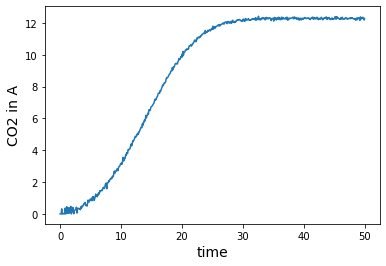

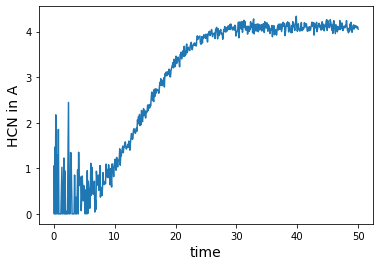

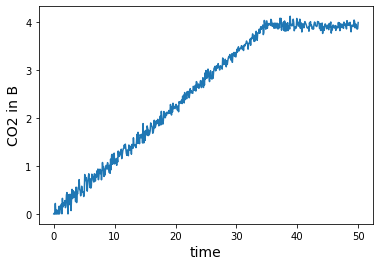

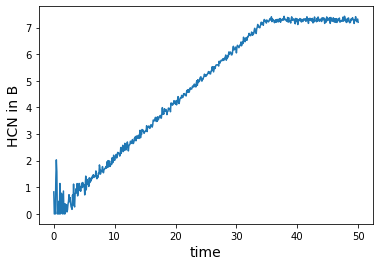

In [8]:
plt.figure(1)
plt.plot(dataBacteria['time'],dataBacteria['CO2 in A'])
plt.xlabel(r'time',fontsize=14)
plt.ylabel(r'CO2 in A',fontsize=14)
plt.figure(2)
plt.plot(dataBacteria['time'],dataBacteria['HCN in A'])
plt.xlabel(r'time',fontsize=14)
plt.ylabel(r'HCN in A',fontsize=14)
plt.figure(3)
plt.plot(dataBacteria['time'],dataBacteria['CO2 in B'])
plt.xlabel(r'time',fontsize=14)
plt.ylabel(r'CO2 in B',fontsize=14)
plt.figure(4)
plt.plot(dataBacteria['time'],dataBacteria['HCN in B'])
plt.xlabel(r'time',fontsize=14)
plt.ylabel(r'HCN in B',fontsize=14)
plt.show()


**2) Error propagation**

Now, we would like to measure the gas emission asymmetry for both cans, which is one way to measure the relative importance of the production of each gas. The asymmetry is defined by
$$\mathcal{A}=\frac{HCN-CO_2}{HCN+CO_2}$$
each of the gas representing here the quantity of gas collected. If both gases are produced in the same amount, it is straightforward to see that the asymmetry is 0. Similarly when only one of the two gas is produced, $\mathcal{A}=1$ or $\mathcal{A}=-1$.
The asymmetry is calculated using data collected after 40 hours, once it is assumed that the growth of the colony is over. 
 - calculate the asymmetry and the error on it for both environments. What do you conclude on the events happening in A and B?


**Solution**

To calculate the asymmetry, one needs to first estimate the mean value of HCN and CO2.

Then, to compute the error, one needs the variance of $\mathcal{A}$, and thus use the generic error propagation formula for a function that depends of N variables: 

$$V(\,f(x_1,x_2,..,x_n)\,) = \sum_{i=1}^n\sum_{j=1}^n \frac{\partial f}{\partial x_i} \frac{\partial f}{\partial x_j} cov\,(x_i,x_j\,) $$
where $cov\,(x_i,x_j\,)$ is the element of the covariance matrix for the pair ($x_i,x_j$)

For a two variable case, as we have here, we can rewrite the variance of $\mathcal{A}$ as :
$$V(\mathcal{A})=\sigma_\mathcal{A}^2=\left(\frac{\partial \mathcal{A}}{\partial HCN}\right)^2 \sigma^2_{HCN} + \left(\frac{\partial \mathcal{A}}{\partial CO_2}\right)^2 \sigma^2_{CO_2} + \frac{\partial \mathcal{A}}{\partial HCN}\frac{\partial \mathcal{A}}{\partial CO_2}cov\,(HCN,CO_2\,)+ \frac{\partial \mathcal{A}}{\partial CO_2}\frac{\partial \mathcal{A}}{\partial HCN}cov\,(CO_2,HCN\,) $$

which is:

$$V(\mathcal{A})=\sigma_\mathcal{A}^2=\left(\frac{\partial \mathcal{A}}{\partial HCN}\right)^2 \sigma^2_{HCN} + \left(\frac{\partial \mathcal{A}}{\partial CO_2}\right)^2 \sigma^2_{CO_2} + 2\frac{\partial \mathcal{A}}{\partial HCN}\frac{\partial \mathcal{A}}{\partial CO_2}cov\,(HCN,CO_2\,) $$


In [9]:
#first, lets get only data for a time greater or equal than 40 hours
db40p=dataBacteria.query('time>=40')

#to compute the asymmetry, we need mean value of each gas quantity for each can
mHCNA = db40p['HCN in A'].mean()
mCO2A = db40p['CO2 in A'].mean()

mHCNB = db40p['HCN in B'].mean()
mCO2B = db40p['CO2 in B'].mean()

#to compute the error on the asymmetry, we need the variance sigma^2 of each component, as well as the covariance matrix elements that link the gas quantities
varHCNA = db40p['HCN in A'].var()
varCO2A = db40p['CO2 in A'].var()
varHCNB = db40p['HCN in B'].var()
varCO2B = db40p['CO2 in B'].var()

covMatrixA = db40p[['HCN in A','CO2 in A']].cov()
covMatrixB = db40p[['HCN in B','CO2 in B']].cov()

#now we need to define the asymmetry and its derivative as function of HCN and CO2
def Asym(co2,hcn):
    return (hcn-co2)/(hcn+co2)

#derivative as function of CO2
def dAsymdCO2(co2,hcn):
    return 2*co2/(hcn+co2)**2

#derivative as function of HCN
def dAsymdHCN(co2,hcn):
    return -2*hcn/(hcn+co2)**2

    
varAsymA = varCO2A*dAsymdCO2(mCO2A,mHCNA)**2 \
         + varHCNA*dAsymdHCN(mCO2A,mHCNA)**2 \
         + 2*dAsymdCO2(mCO2A,mHCNA)*dAsymdHCN(mCO2A,mHCNA)*covMatrixA['HCN in A']['CO2 in A']
        
varAsymB = varCO2B*dAsymdCO2(mCO2B,mHCNB)**2 \
         + varHCNB*dAsymdHCN(mCO2B,mHCNB)**2 \
         + 2*dAsymdCO2(mCO2B,mHCNB)*dAsymdHCN(mCO2B,mHCNB)*covMatrixB['HCN in B']['CO2 in B']
        
print('asymmetry in A :', Asym(mHCNA,mCO2A), '+-', np.sqrt(varAsymA))
print('asymmetry in B :', Asym(mHCNB,mCO2B), '+-', np.sqrt(varAsymB))

asymmetry in A : 0.4994950446312203 +- 0.004591326637878051
asymmetry in B : -0.30059200604943626 +- 0.00826683722251662


From the previous result, we clearly confirm what we already could see by looking at the data : in both environments, one gas dominates significantly, and the dominant gas is not the same one in each can.